<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic= True
torch.backends.cudnn.benchmark= False

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
mean=[0.485,0.456,0.406]
std=[0.229,0.224,0.225]
transform= transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=mean,std=std)
  ])
trainset=datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True,download=True,transform=transform)
testset=datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False,transform=transform)

trainloader=DataLoader(trainset,batch_size=64,shuffle=True)
testloader=DataLoader(testset,batch_size=64,shuffle=False)


Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [ ]:
for images,labels in trainloader:
  print(images.size(),labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [ ]:
model = models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
for param in model.parameters():
  param.requires_grad=False


In [ ]:
model.classifier[-1]=nn.Sequential(
                     nn.Linear(in_features=4096,out_features=10),
                     nn.LogSoftmax(dim=1))

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [ ]:
criterion = nn.NLLLoss()

In [ ]:
from torch.optim import Adam 
model=model.to(device)
optimizer = Adam(model.parameters())

In [ ]:
num_epochs=1
batch_loss=0
cum_epoch_loss=0
for e in range(num_epochs):
  cum_epoch_loss=0
  for batch, (images,labels) in enumerate(trainloader,1):
    images=images.to(device)
    labels=labels.to(device)

    optimizer.zero_grad()
    logps=model(images)
    loss=criterion(logps,labels)
    loss.backward()
    optimizer.step()

    batch_loss+=loss.item()
    print(f'Epoch({e}/{num_epochs}: Batch number({batch}/{(len(trainloader))} Batch loss : {loss.item()}')
  
  print(f'Training loss: {batch_loss/len(trainloader)}')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch(0/1: Batch number(1/782 Batch loss : 2.3670763969421387
Epoch(0/1: Batch number(2/782 Batch loss : 2.2440648078918457
Epoch(0/1: Batch number(3/782 Batch loss : 2.0836563110351562
Epoch(0/1: Batch number(4/782 Batch loss : 1.9555302858352661
Epoch(0/1: Batch number(5/782 Batch loss : 1.8201491832733154
Epoch(0/1: Batch number(6/782 Batch loss : 1.6128766536712646
Epoch(0/1: Batch number(7/782 Batch loss : 1.4988646507263184
Epoch(0/1: Batch number(8/782 Batch loss : 1.4244024753570557
Epoch(0/1: Batch number(9/782 Batch loss : 1.1824637651443481
Epoch(0/1: Batch number(10/782 Batch loss : 1.2348178625106812
Epoch(0/1: Batch number(11/782 Batch loss : 1.1804953813552856
Epoch(0/1: Batch number(12/782 Batch loss : 1.3310612440109253
Epoch(0/1: Batch number(13/782 Batch loss : 1.2004382610321045
Epoch(0/1: Batch number(14/782 Batch loss : 1.0369166135787964
Epoch(0/1: Batch number(15/782 Batch loss : 1.0154385566711426
Epoch(0/1: Batch number(16/782 Batch loss : 0.9989744424819946
E

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
CIFAR10_classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
model.to('cpu')
model.eval()
with torch.no_grad():
  images,labels=next(iter(testloader))
  logps=model(images)
  output=torch.exp(logps)
  print(output)

tensor([[5.4032e-04, 3.7436e-03, 1.4605e-03, 8.3457e-01, 1.8219e-04, 4.8692e-02,
         1.0731e-01, 2.0487e-03, 1.1956e-03, 2.6216e-04],
        [5.0050e-02, 4.3743e-01, 7.8035e-05, 3.1938e-04, 5.3030e-06, 6.5727e-06,
         2.6307e-05, 6.0526e-06, 5.0515e-01, 6.9286e-03],
        [6.3839e-03, 1.1874e-02, 2.6079e-06, 3.7786e-06, 1.6870e-06, 8.2652e-08,
         4.6463e-07, 2.4799e-06, 9.8154e-01, 1.8712e-04],
        [6.2441e-01, 2.2204e-03, 5.7987e-02, 9.8535e-02, 5.6419e-04, 9.5933e-04,
         7.0415e-03, 8.6620e-04, 2.0693e-01, 4.8376e-04],
        [6.7900e-08, 3.4207e-07, 2.1586e-03, 4.8610e-04, 1.1383e-04, 9.9507e-06,
         9.9723e-01, 2.1082e-07, 1.0295e-07, 3.2017e-07],
        [2.5565e-06, 2.0893e-06, 3.0996e-05, 5.0729e-02, 3.9032e-03, 5.6397e-02,
         8.8882e-01, 1.0313e-04, 2.6902e-07, 1.2369e-05],
        [8.2788e-06, 9.9850e-01, 2.0176e-07, 1.4498e-05, 3.1263e-08, 1.5960e-05,
         3.7767e-06, 4.2742e-06, 2.0005e-06, 1.4485e-03],
        [2.2224e-02, 1.0979

In [ ]:
CIFAR10_classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
model.to('cpu')
model.eval()
with torch.no_grad():
  images,labels=next(iter(testloader))
  logps=model(images)
  output=torch.exp(logps)
  pred=torch.argmax(output,1)

model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

ship


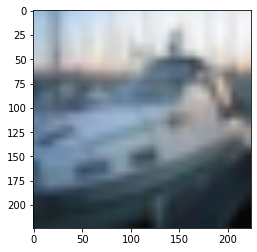

In [ ]:
test_image_id=2
def normalize(tensor):
  tensor=tensor*std+mean
  return tensor

def denormalize(tensor):
  tensor=tensor*std+mean
  return tensor

def show_img(img):
  img=img.numpy().transpose((1,2,0))
  img=denormalize(img)
  img=np.clip(img,0,1)
  plt.imshow(img)

def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
  return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

In [ ]:
pred

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 1,
        5, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3])

In [ ]:
images.size()

torch.Size([64, 3, 224, 224])

In [ ]:
images[0].size()

torch.Size([3, 224, 224])

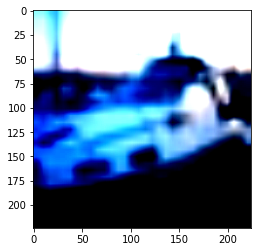

In [ ]:
plt.imshow(np.clip(np.transpose(images[test_image_id],(1,2,0)),0,1))

'ship'

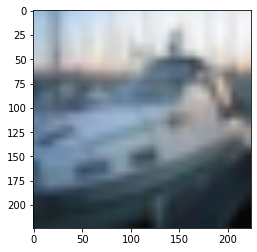

In [ ]:
show_img(images[test_image_id])
get_CIFAR10_class(pred[test_image_id])


In [ ]:
pred,labels

(tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 1,
         5, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3]),
 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]))

In [ ]:
pred==labels

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False, False,
         True,  True,  True,  True])

In [ ]:
(pred==labels).sum().item()

57

In [ ]:
model.eval()
with torch.no_grad():
  num_correct=0
  total=0
  cnt=0
  #set_trace()
  for images,labels in testloader:
    logps=model(images)
    output=torch.exp(logps)
    #print(output)

    pred = torch.argmax(output,1)
    total+=labels.size(0)

    num_correct+=(pred==labels).sum().item()
    print(f'Batch({batch}/{len(testloader)})')
    
    if batch>=2:
      break
  print("accuracy is :",(num_correct*100/total))

Batch(782/157)
accuracy is : 89.0625
